In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, I/O
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display
import os
from matplotlib import rcParams
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
import warnings
warnings.filterwarnings("ignore")

In [7]:
path = './data'
df = pd.read_csv(path+'/songs_df.csv')

display(df.info())
display(df.describe().T)
df

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\pgmin\anaconda3\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Users\pgmin\anaconda3\lib\logging\handlers.py", line 177, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\pgmin\anaconda3\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\pgmin\\OneDrive\\Desktop\\Fall_22\\CSC_4550\\Final_Project\\.mrx-link-logs\\SongsAnalysis.ipynb.log' -> 'C:\\Users\\pgmin\\OneDrive\\Desktop\\Fall_22\\CSC_4550\\Final_Project\\.mrx-link-logs\\SongsAnalysis.ipynb.log.1'
Call stack:
  File "C:\Users\pgmin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\pgmin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\pgmin\anaconda3\li

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4800 non-null   object 
 1   primary_artist    4800 non-null   object 
 2   danceability      4800 non-null   float64
 3   energy            4800 non-null   float64
 4   key               4800 non-null   int64  
 5   loudness          4800 non-null   float64
 6   mode              4800 non-null   int64  
 7   speechiness       4800 non-null   float64
 8   acousticness      4800 non-null   float64
 9   instrumentalness  4800 non-null   float64
 10  liveness          4800 non-null   float64
 11  valence           4800 non-null   float64
 12  tempo             4800 non-null   float64
 13  time_signature    4800 non-null   int64  
 14  duration_s        4800 non-null   int64  
 15  year              4800 non-null   int64  
 16  genres            4800 non-null   object 


None

count         mean        std          min          25%  \
danceability      4800.0     0.630908   0.147346     0.135000     0.539000   
energy            4800.0     0.663262   0.189208     0.026400     0.534750   
key               4800.0     5.306875   3.603180     0.000000     2.000000   
loudness          4800.0    -7.941893   3.454099   -24.709000   -10.088500   
mode              4800.0     0.662500   0.472906     0.000000     0.000000   
speechiness       4800.0     0.071971   0.075093     0.022500     0.032700   
acousticness      4800.0     0.199933   0.226299     0.000005     0.026075   
instrumentalness  4800.0     0.028952   0.118180     0.000000     0.000000   
liveness          4800.0     0.173598   0.141214     0.015000     0.083575   
valence           4800.0     0.597184   0.240588     0.038100     0.410000   
tempo             4800.0   119.899201  26.666675    50.937000    99.981000   
time_signature    4800.0     3.975208   0.209212     1.000000     4.000000   
duration_s        4800.0   243.995833  60.975572    93.000000   209.000000   
year              4800.0  1994.250000  14.659432  1970.000000  1981.750000   

                          50%          75%       max  
danceability         0.644000     0.734000     0.980  
energy               0.686000     0.817000     0.996  
key                  5.000000     9.000000    11.000  
loudness            -7.247000    -5.304500    -0.140  
mode                 1.000000     1.000000     1.000  
speechiness          0.043100     0.071825     0.911  
acousticness         0.106000     0.305000     0.978  
instrumentalness     0.000009     0.000961     0.985  
liveness             0.119000     0.223000     0.989  
valence              0.615500     0.800000     0.989  
tempo              119.536500   133.935750   210.857  
time_signature       4.000000     4.000000     5.000  
duration_s         235.000000   269.000000  1561.000  
year              1993.500000  2007.250000  2019.000

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\pgmin\anaconda3\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Users\pgmin\anaconda3\lib\logging\handlers.py", line 177, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\pgmin\anaconda3\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\pgmin\\OneDrive\\Desktop\\Fall_22\\CSC_4550\\Final_Project\\.mrx-link-logs\\SongsAnalysis.ipynb.log' -> 'C:\\Users\\pgmin\\OneDrive\\Desktop\\Fall_22\\CSC_4550\\Final_Project\\.mrx-link-logs\\SongsAnalysis.ipynb.log.1'
Call stack:
  File "C:\Users\pgmin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\pgmin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\pgmin\anaconda3\li

title                primary_artist  danceability  \
0     Let It Be - Remastered 2009                   The Beatles         0.443   
1                         Cecilia             Simon & Garfunkel         0.755   
2           Son of a Preacher Man               Aretha Franklin         0.474   
3            Who'll Stop The Rain  Creedence Clearwater Revival         0.598   
4                 Big Yellow Taxi                 Joni Mitchell         0.611   
...                           ...                           ...           ...   
4795               Ladbroke Grove                     AJ Tracey         0.902   
4796                   Slide Away                   Miley Cyrus         0.530   
4797                   The Git Up                  Blanco Brown         0.847   
4798                       Easier           5 Seconds of Summer         0.562   
4799             Lost Without You                 Freya Ridings         0.386   

      energy  key  loudness  mode  speechiness  acousticness  \
0      0.403    0    -8.339     1       0.0322        0.6310   
1      0.876    0    -8.867     1       0.0362        0.3570   
2      0.473    2   -11.454     1       0.0601        0.5450   
3      0.797    7    -6.793     1       0.0332        0.0424   
4      0.470    4    -9.135     1       0.0356        0.5790   
...      ...  ...       ...   ...          ...           ...   
4795   0.839   11    -9.447     0       0.2080        0.0933   
4796   0.538    5    -6.672     1       0.0335        0.1700   
4797   0.678    9    -8.635     1       0.1090        0.0669   
4798   0.460    5    -4.173     1       0.2590        0.4760   
4799   0.136    6    -9.267     1       0.0458        0.9320   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000000    0.1110   0.4100  143.462               4   
1             0.000005    0.2200   0.9540  102.762               4   
2             0.000001    0.0356   0.5610   77.583               4   
3             0.000407    0.0717   0.6220  123.566               4   
4             0.000000    0.5810   0.9700   85.527               4   
...                ...       ...      ...      ...             ...   
4795          0.000000    0.1020   0.7270  133.989               4   
4796          0.000003    0.2480   0.2880  148.051               4   
4797          0.000000    0.2740   0.8110   97.984               4   
4798          0.000000    0.1070   0.6230  176.055               4   
4799          0.000000    0.0653   0.0976   67.016               3   

      duration_s  year                                   genres  \
0            243  1970                                 ['rock']   
1            175  1970                         ['folk', 'rock']   
2            199  1970                        ['blues', 'soul']   
3            147  1970                                 ['rock']   
4            135  1970                         ['folk', 'rock']   
...          ...   ...                                      ...   
4795         191  2019  ['dance/electronic', 'hip hop', 'rock']   
4796         234  2019                                  ['pop']   
4797         201  2019                                  ['rap']   
4798         158  2019                                  ['pop']   
4799         226  2019                                  ['pop']   

                                                 lyrics  
0     When I find myself in times of trouble Mother ...  
1     Cilia youre breaking my heart. Youre shaking m...  
2     Billy Ray was a preachers son. And when his da...  
3     Long as I remember the rain been coming down. ...  
4     They paved paradise and put up a parking lot. ...  
...                                                 ...  
4795  No one sees. No one. One. No one sees. No one ...  
4796  Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...  
4797  Right now. I just need you to get real loose. ...  
4798  Is it easier to stay Is it easier to go. I don...  
47

In [5]:
# Reformat 'mode' and 'key' columns
df.drop_duplicates()
df['mode'].replace({1: 'Major', 0: 'minor'}, inplace=True)
key_dict = { 0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭',
             4: 'E', 5: 'F', 6: 'F♯/G♭', 7: 'G',
             8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B',
             -1: 'Unknown'
           }
df['key'].replace(key_dict, inplace=True)

df

title                primary_artist  danceability  \
0     Let It Be - Remastered 2009                   The Beatles         0.443   
1                         Cecilia             Simon & Garfunkel         0.755   
2           Son of a Preacher Man               Aretha Franklin         0.474   
3            Who'll Stop The Rain  Creedence Clearwater Revival         0.598   
4                 Big Yellow Taxi                 Joni Mitchell         0.611   
...                           ...                           ...           ...   
4795               Ladbroke Grove                     AJ Tracey         0.902   
4796                   Slide Away                   Miley Cyrus         0.530   
4797                   The Git Up                  Blanco Brown         0.847   
4798                       Easier           5 Seconds of Summer         0.562   
4799             Lost Without You                 Freya Ridings         0.386   

      energy    key  loudness   mode  speechiness  acousticness  \
0      0.403      C    -8.339  Major       0.0322        0.6310   
1      0.876      C    -8.867  Major       0.0362        0.3570   
2      0.473      D   -11.454  Major       0.0601        0.5450   
3      0.797      G    -6.793  Major       0.0332        0.0424   
4      0.470      E    -9.135  Major       0.0356        0.5790   
...      ...    ...       ...    ...          ...           ...   
4795   0.839      B    -9.447  minor       0.2080        0.0933   
4796   0.538      F    -6.672  Major       0.0335        0.1700   
4797   0.678      A    -8.635  Major       0.1090        0.0669   
4798   0.460      F    -4.173  Major       0.2590        0.4760   
4799   0.136  F♯/G♭    -9.267  Major       0.0458        0.9320   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000000    0.1110   0.4100  143.462               4   
1             0.000005    0.2200   0.9540  102.762               4   
2             0.000001    0.0356   0.5610   77.583               4   
3             0.000407    0.0717   0.6220  123.566               4   
4             0.000000    0.5810   0.9700   85.527               4   
...                ...       ...      ...      ...             ...   
4795          0.000000    0.1020   0.7270  133.989               4   
4796          0.000003    0.2480   0.2880  148.051               4   
4797          0.000000    0.2740   0.8110   97.984               4   
4798          0.000000    0.1070   0.6230  176.055               4   
4799          0.000000    0.0653   0.0976   67.016               3   

      duration_s  year                                   genres  \
0            243  1970                                 ['rock']   
1            175  1970                         ['folk', 'rock']   
2            199  1970                        ['blues', 'soul']   
3            147  1970                                 ['rock']   
4            135  1970                         ['folk', 'rock']   
...          ...   ...                                      ...   
4795         191  2019  ['dance/electronic', 'hip hop', 'rock']   
4796         234  2019                                  ['pop']   
4797         201  2019                                  ['rap']   
4798         158  2019                                  ['pop']   
4799         226  2019                                  ['pop']   

                                                 lyrics  
0     When I find myself in times of trouble Mother ...  
1     Cilia youre breaking my heart. Youre shaking m...  
2     Billy Ray was a preachers son. And when his da...  
3     Long as I remember the rain been coming down. ...  
4     They paved paradise and put up a parking lot. ...  
...                                                 ...  
4795  No one sees. No one. One. No one sees. No one ...  
4796  Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...  
4797  Right now. I just need you to get real loose. ...  
4798  Is it easier to st

In [7]:
# Descending counts of keys
print('Common keys: \n', df['key'].value_counts().sort_values(ascending=False), '\n')

# Descending counts of appearances of artists
artists = df['primary_artist'].value_counts().sort_values(ascending=False)
artists.columns = ['artist', 'appearances']
print('Common artists: \n', artists)

Common keys: 
 C        576
G        504
A        489
C♯/D♭    481
D        452
F        419
B        405
E        376
A♯/B♭    322
G♯/A♭    320
F♯/G♭    319
D♯/E♭    137
Name: key, dtype: int64 

Common artists: 
 Michael Jackson    29
Madonna            28
Rihanna            28
Elton John         27
Drake              24
                   ..
Travie McCoy        1
Iyaz                1
Don Omar            1
Stromae             1
Freya Ridings       1
Name: primary_artist, Length: 1897, dtype: int64


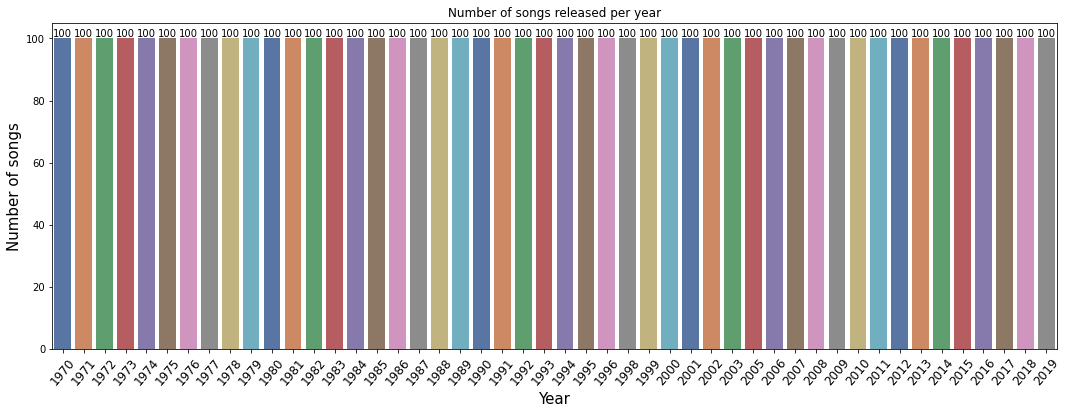

In [8]:
songs_per_year = (df.year.value_counts().rename_axis('year').reset_index(name='songs'))

plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year')
plt.xticks(fontsize=12, rotation = 50)
ax.bar_label(ax.containers[0],size = 10)
plt.show()

# The df is missing data from 1997 and 2004

# **Analysis**

## Distribution of music features

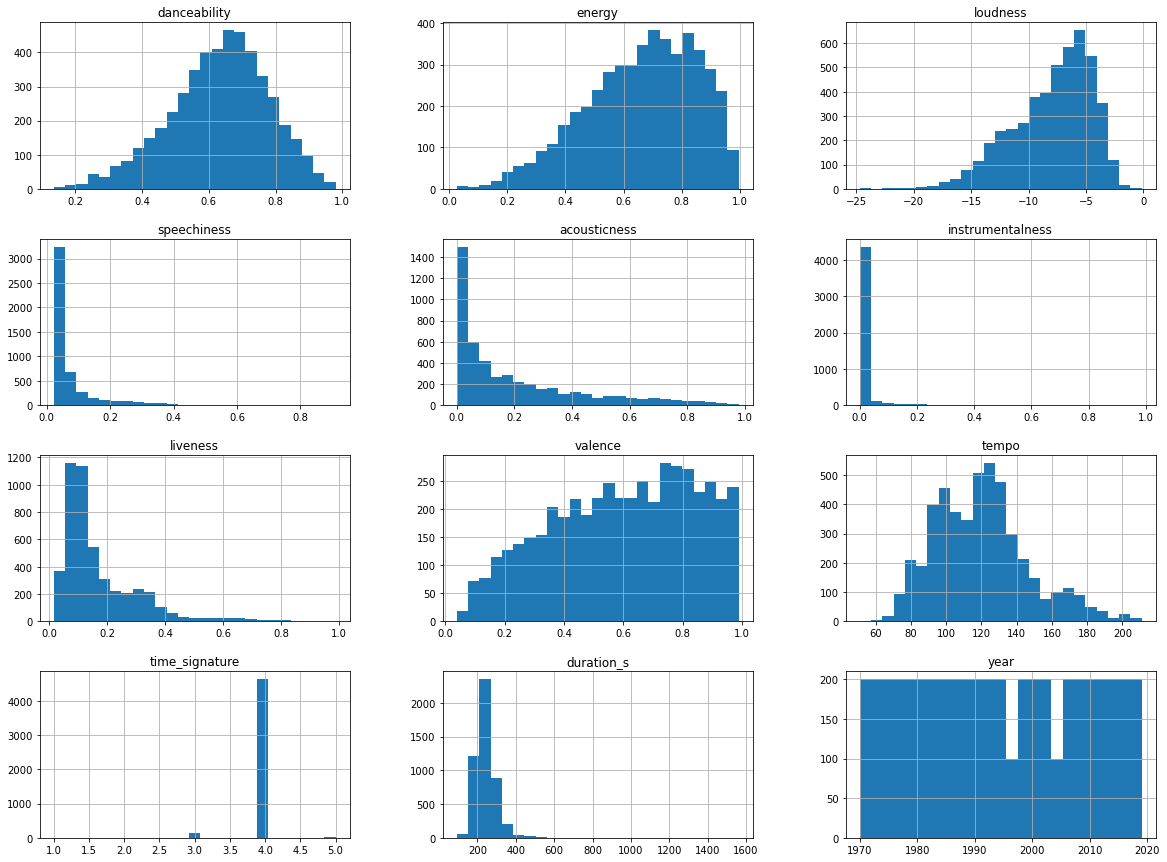

In [9]:
# Histogram
df.hist(bins=25,figsize=(20,15))
plt.show()

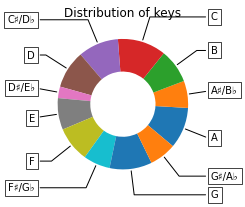

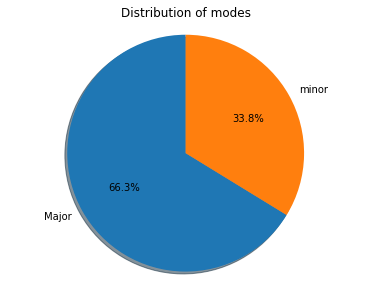

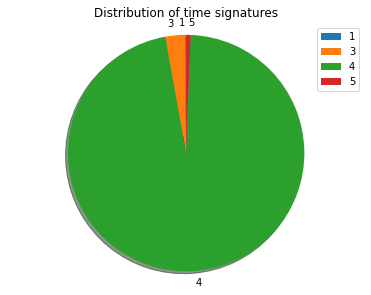

In [10]:
# Some pie charts of key, mode and time signature
ig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
key_labels = sorted(df['key'].unique())
key_sizes = df['key'].value_counts().sort_index().to_list()
wedges, texts = ax.pie(key_sizes, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(key_labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Distribution of keys")
plt.show()


mode_sizes = df['mode'].value_counts().sort_index().to_list()
mode_labels = sorted(df['mode'].unique())
explode = (0, 0)
fig2, ax2 = plt.subplots()
ax2.pie(mode_sizes, explode=explode, labels=mode_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') 
ax2.set_title("Distribution of modes")
plt.show()

time_sizes = df['time_signature'].value_counts().sort_index().to_list()
time_labels = sorted(df['time_signature'].unique())
explode = (0, 0, 0, 0)
fig3, ax3 = plt.subplots()
ax3.pie(time_sizes, explode=explode, labels=time_labels, shadow=True, startangle=90)
ax3.axis('equal') 
ax3.set_title("Distribution of time signatures")
plt.legend()
plt.show()

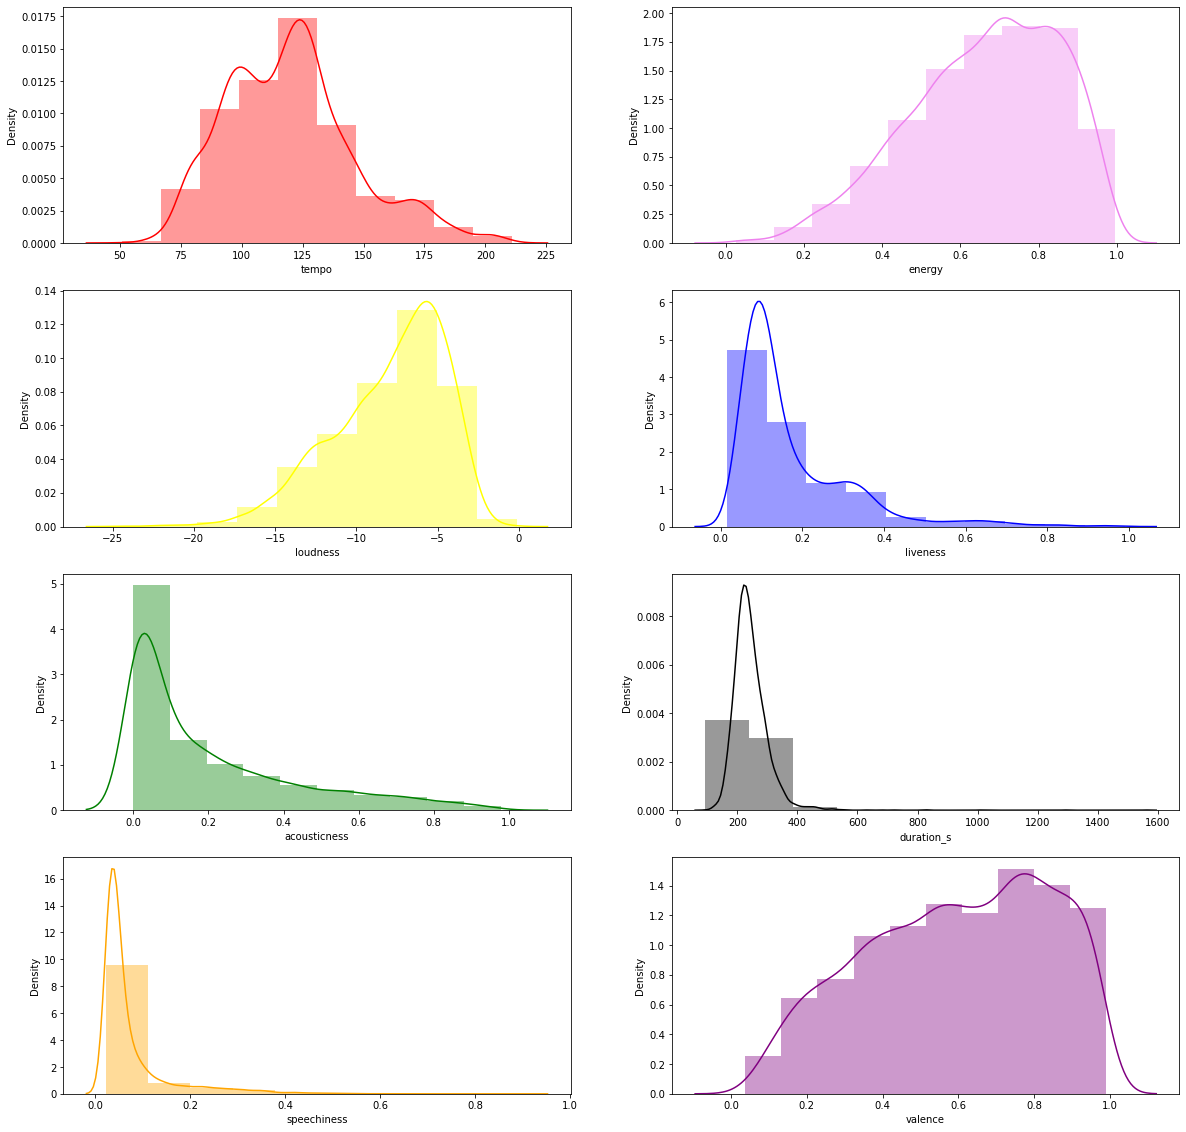

In [11]:
# Some graphs of the features
fig,ax = plt.subplots(4,2,figsize=(20,20))
sns.distplot(df['tempo'],color='red',ax=ax[0][0],bins=10)
sns.distplot(df['energy'],ax=ax[0][1],color='violet',bins=10)
sns.distplot(df['loudness'],ax=ax[1][0],color='yellow',bins=10)
sns.distplot(df['liveness'],ax=ax[1][1],color='blue',bins=10)
sns.distplot(df['acousticness'],ax=ax[2][0],color='green',bins=10)
sns.distplot(df['duration_s'],ax=ax[2][1],color='black',bins=10)
sns.distplot(df['speechiness'],ax=ax[3][0],color='orange',bins=10)
sns.distplot(df['valence'],ax=ax[3][1],color='purple',bins=10)
plt.show()

## Changes of features over time or based on artist

Ascending average tempo by artist:
                   tempo
primary_artist          
MoKenStef         64.979
Freya Ridings     67.016
Bobby McFerrin    68.837
Tom Walker        68.976
Jeffrey Osborne   69.199
...                  ...
Steve Perry      203.753
Blake Shelton    205.570
Carole King      208.282
John Waite       208.571
The Nolans       210.654

[1897 rows x 1 columns]
Ascending average loudness by artist:
                     loudness
primary_artist               
Dan Fogelberg        -24.7090
Bobby McFerrin       -22.6020
Joe Jackson          -20.2080
Brook Benton         -19.1550
Digable Planets      -18.9430
...                       ...
Diddy - Dirty Money   -1.9210
Gnarls Barkley        -1.6090
The Click Five        -1.6000
La Roux               -1.5235
DJ Fresh              -0.7400

[1897 rows x 1 columns]


<AxesSubplot:title={'center':'Average speechiness changes over year'}, xlabel='year'>

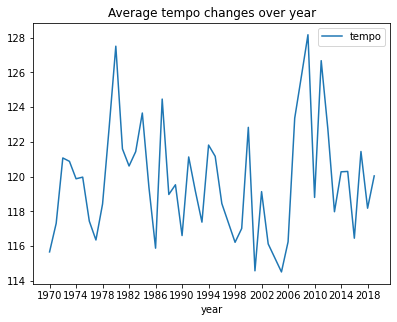

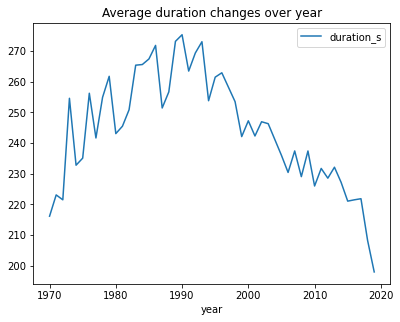

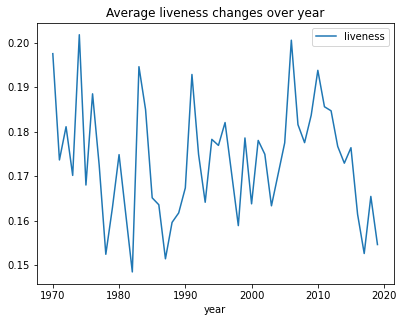

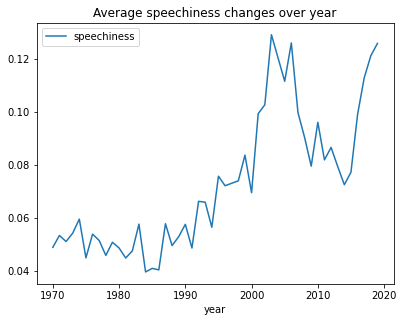

In [12]:
def get_average_x_by_y(x, y, sort):
    if (sort==True):
        return (df.groupby([y]).agg({str(x):'mean'})).sort_values(x)
    return (df.groupby([y]).agg({str(x):'mean'}))

print('Ascending average tempo by artist:')
print(get_average_x_by_y('tempo', 'primary_artist', True))

print('Ascending average loudness by artist:')
print(get_average_x_by_y('loudness', 'primary_artist', True))

tempo_by_years = get_average_x_by_y('tempo', 'year', False)
tempo_by_years.plot(title="Average tempo changes over year", xticks=range(1970, 2020, 4))

duration_by_years = get_average_x_by_y('duration_s', 'year', False)
duration_by_years.plot(title="Average duration changes over year")

liveness_by_years = get_average_x_by_y('liveness', 'year', False)
liveness_by_years.plot(title="Average liveness changes over year")

speechiness_by_years = get_average_x_by_y('speechiness', 'year', False)
speechiness_by_years.plot(title="Average speechiness changes over year")

## Correlation between the features

<AxesSubplot:>

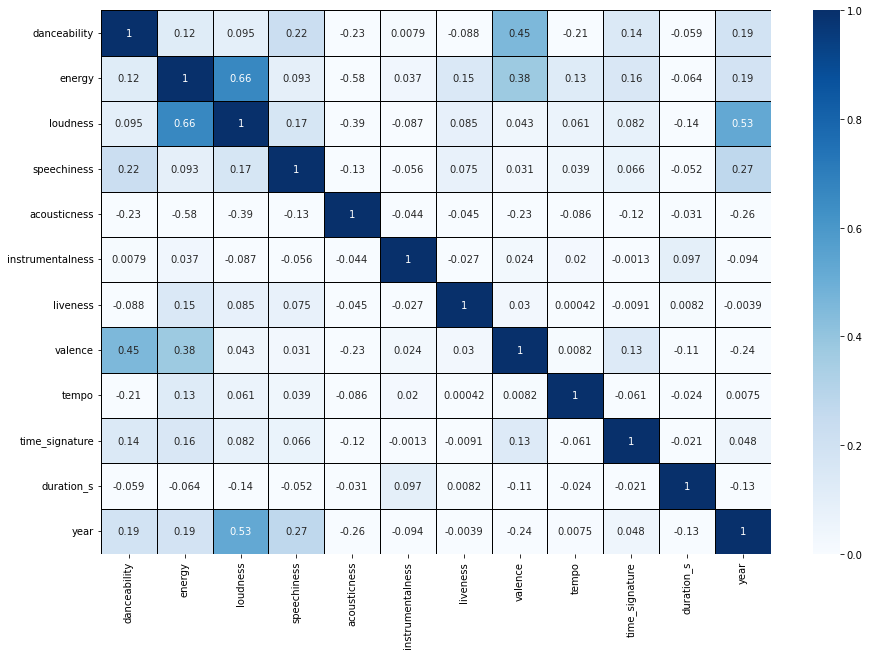

In [13]:
# Heatmap
features = df.drop(["primary_artist", "title"], axis=1)
corr = features.corr()
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black', annot=True)

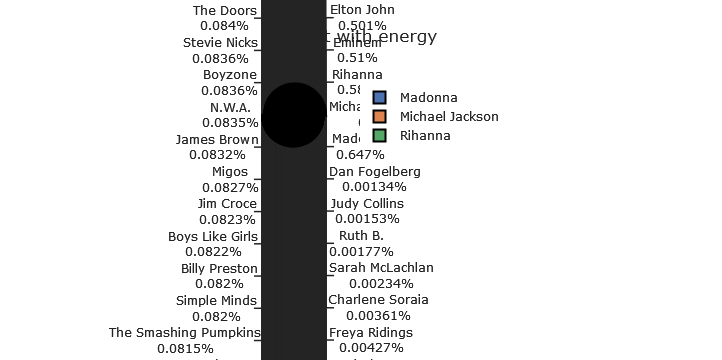

In [14]:
fig = px.pie(df,values ='energy',names='primary_artist', title='Artist with energy',template='seaborn')
fig.update_traces(rotation=90,pull=0.02,textinfo="percent+label",marker=dict(line=dict(color='#000000', width=2)))
fig.show()

## Frequency of artist appearance, genre and words in the lyrics

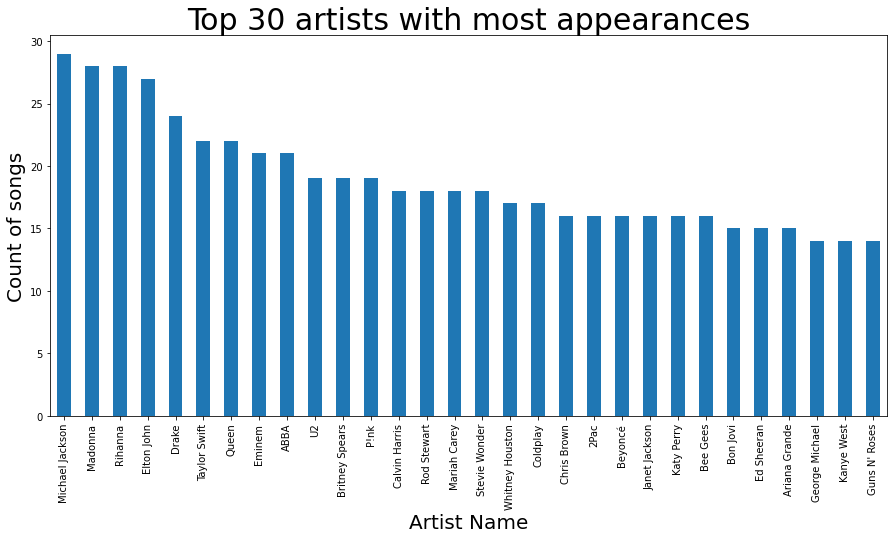

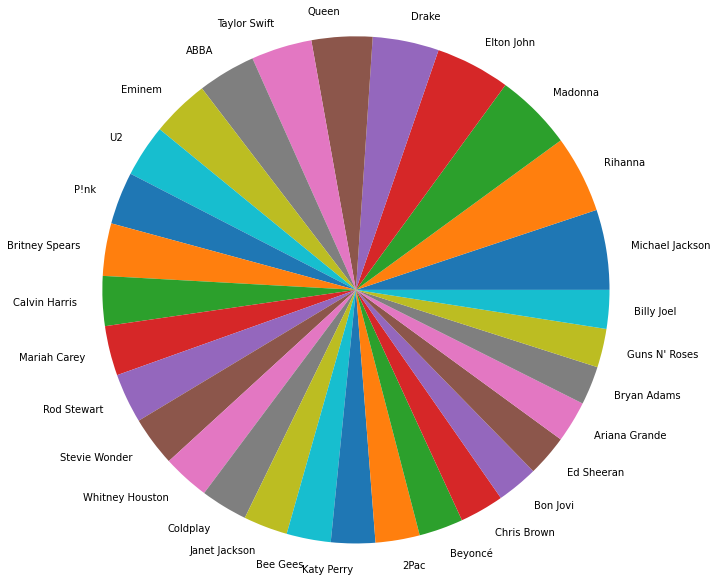

In [15]:
fig = plt.figure(figsize = (15,7))
df.groupby('primary_artist')['title'].agg(len).sort_values(ascending = False)[:30].plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Top 30 artists with most appearances', fontsize = 30)

labels = df['primary_artist'].value_counts()[:30].index
sizes = df['primary_artist'].value_counts()[:30].values
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

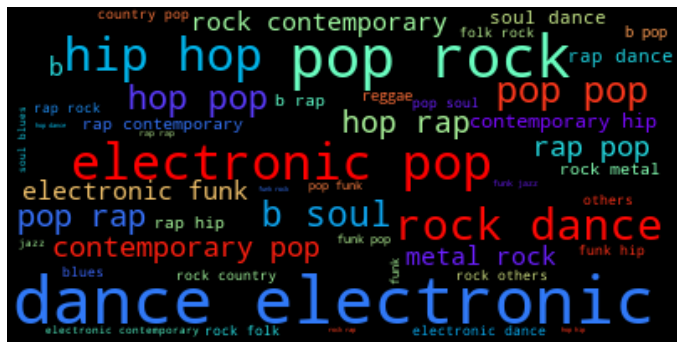

In [16]:
# Reformat the genres column
import ast
import itertools

genres_list = []
for entry in df['genres']:
    new_entry = [n.strip() for n in ast.literal_eval(entry)]
    genres_list.append(new_entry)
    
joined_list = list(itertools.chain.from_iterable(genres_list))

# Genres wordcloud
genres = ' '.join(joined_list)
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

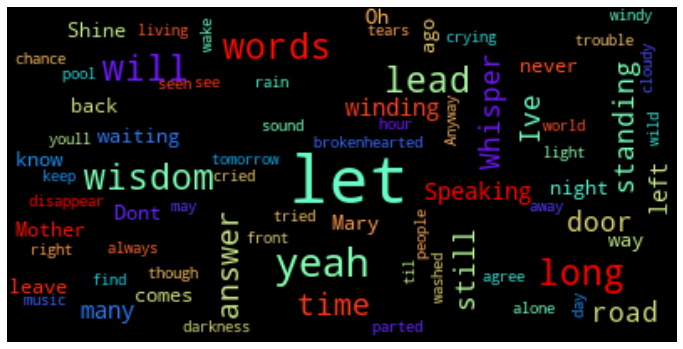

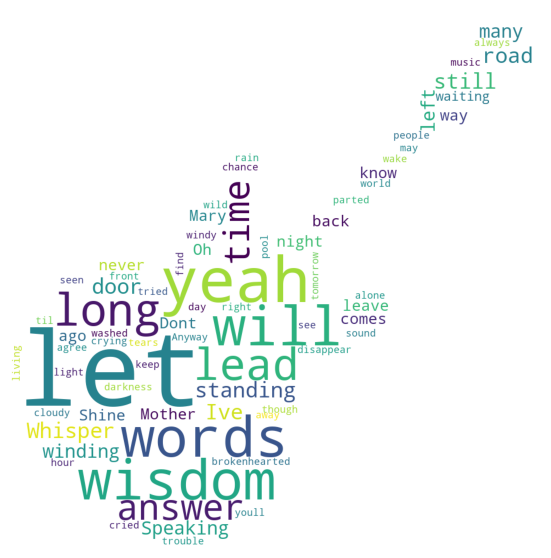

In [9]:
# Lyrics wordcloud
lyrics_list = df[df['primary_artist']=='The Beatles']['lyrics'].to_list()
lyrics_words = " ".join(map(str,lyrics_list))
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(lyrics_words)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

from PIL import Image
mask = np.array(Image.open('./mask_guitar.png'))
wordcloud = WordCloud(background_color='white', max_words=200,
                     mask=mask).generate(lyrics_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

sia = SIA()
blobber = Blobber(analyzer=NaiveBayesAnalyzer())

def get_sentiment_scores(content):
    sia_scores = sia.polarity_scores(content)
    
    return pd.Series({
        'content': content,
        'nltk': sia_scores['compound'],
})

for idx, lyrics in enumerate(df['lyrics']):
    if type(lyrics) is not float:            
        scores = get_sentiment_scores(lyrics)
        df.at[idx, 'nltk'] = scores['nltk']    

In [18]:
# import text2emotion as te

# for idx, lyrics in enumerate(df['lyrics']):
#     if type(lyrics) is not float:            
#         emotions = te.get_emotion(lyrics)
#         df.at[idx, 'Happy'] = emotions['Happy']     
#         df.at[idx, 'Angry'] = emotions['Angry'] 
#         df.at[idx, 'Surprise'] = emotions['Surprise']    
#         df.at[idx, 'Sad'] = emotions['Sad'] 
#         df.at[idx, 'Fear'] = emotions['Fear']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# path = './data'
# df = pd.read_csv(path+'/songs_df_final.csv')
# display(df.info())
# display(df.describe().T)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4800 non-null   object 
 1   primary_artist    4800 non-null   object 
 2   danceability      4800 non-null   float64
 3   energy            4800 non-null   float64
 4   key               4800 non-null   object 
 5   loudness          4800 non-null   float64
 6   mode              4800 non-null   object 
 7   speechiness       4800 non-null   float64
 8   acousticness      4800 non-null   float64
 9   instrumentalness  4800 non-null   float64
 10  liveness          4800 non-null   float64
 11  valence           4800 non-null   float64
 12  tempo             4800 non-null   float64
 13  time_signature    4800 non-null   int64  
 14  duration_s        4800 non-null   int64  
 15  year              4800 non-null   int64  
 16  genres            4800 non-null   object 


None

count         mean        std          min          25%  \
danceability      4800.0     0.630908   0.147346     0.135000     0.539000   
energy            4800.0     0.663262   0.189208     0.026400     0.534750   
loudness          4800.0    -7.941893   3.454099   -24.709000   -10.088500   
speechiness       4800.0     0.071971   0.075093     0.022500     0.032700   
acousticness      4800.0     0.199933   0.226299     0.000005     0.026075   
instrumentalness  4800.0     0.028952   0.118180     0.000000     0.000000   
liveness          4800.0     0.173598   0.141214     0.015000     0.083575   
valence           4800.0     0.597184   0.240588     0.038100     0.410000   
tempo             4800.0   119.899201  26.666675    50.937000    99.981000   
time_signature    4800.0     3.975208   0.209212     1.000000     4.000000   
duration_s        4800.0   243.995833  60.975572    93.000000   209.000000   
year              4800.0  1994.250000  14.659432  1970.000000  1981.750000   
nltk              4628.0     0.402634   0.778731    -0.999600    -0.361225   
Happy             4628.0     0.180361   0.157591     0.000000     0.060000   
Angry             4628.0     0.085707   0.099057     0.000000     0.000000   
Surprise          4628.0     0.207377   0.156617     0.000000     0.100000   
Sad               4628.0     0.281424   0.163730     0.000000     0.170000   
Fear              4628.0     0.239676   0.160497     0.000000     0.120000   

                          50%          75%       max  
danceability         0.644000     0.734000     0.980  
energy               0.686000     0.817000     0.996  
loudness            -7.247000    -5.304500    -0.140  
speechiness          0.043100     0.071825     0.911  
acousticness         0.106000     0.305000     0.978  
instrumentalness     0.000009     0.000961     0.985  
liveness             0.119000     0.223000     0.989  
valence              0.615500     0.800000     0.989  
tempo              119.536500   133.935750   210.857  
time_signature       4.000000     4.000000     5.000  
duration_s         235.000000   269.000000  1561.000  
year              1993.500000  2007.250000  2019.000  
nltk                 0.904250     0.983300     1.000  
Happy                0.140000     0.260000     1.000  
Angry                0.060000     0.120000     1.000  
Surprise             0.180000     0.290000     1.000  
Sad                  0.260000     0.380000     1.000  
Fear                 0.220000     0.330000     1.000

title                primary_artist  danceability  \
0     Let It Be - Remastered 2009                   The Beatles         0.443   
1                         Cecilia             Simon & Garfunkel         0.755   
2           Son of a Preacher Man               Aretha Franklin         0.474   
3            Who'll Stop The Rain  Creedence Clearwater Revival         0.598   
4                 Big Yellow Taxi                 Joni Mitchell         0.611   
...                           ...                           ...           ...   
4795               Ladbroke Grove                     AJ Tracey         0.902   
4796                   Slide Away                   Miley Cyrus         0.530   
4797                   The Git Up                  Blanco Brown         0.847   
4798                       Easier           5 Seconds of Summer         0.562   
4799             Lost Without You                 Freya Ridings         0.386   

      energy    key  loudness   mode  speechiness  acousticness  \
0      0.403      C    -8.339  Major       0.0322        0.6310   
1      0.876      C    -8.867  Major       0.0362        0.3570   
2      0.473      D   -11.454  Major       0.0601        0.5450   
3      0.797      G    -6.793  Major       0.0332        0.0424   
4      0.470      E    -9.135  Major       0.0356        0.5790   
...      ...    ...       ...    ...          ...           ...   
4795   0.839      B    -9.447  minor       0.2080        0.0933   
4796   0.538      F    -6.672  Major       0.0335        0.1700   
4797   0.678      A    -8.635  Major       0.1090        0.0669   
4798   0.460      F    -4.173  Major       0.2590        0.4760   
4799   0.136  F♯/G♭    -9.267  Major       0.0458        0.9320   

      instrumentalness  ...  duration_s  year  \
0             0.000000  ...         243  1970   
1             0.000005  ...         175  1970   
2             0.000001  ...         199  1970   
3             0.000407  ...         147  1970   
4             0.000000  ...         135  1970   
...                ...  ...         ...   ...   
4795          0.000000  ...         191  2019   
4796          0.000003  ...         234  2019   
4797          0.000000  ...         201  2019   
4798          0.000000  ...         158  2019   
4799          0.000000  ...         226  2019   

                                       genres  \
0                                    ['rock']   
1                            ['folk', 'rock']   
2                           ['blues', 'soul']   
3                                    ['rock']   
4                            ['folk', 'rock']   
...                                       ...   
4795  ['dance/electronic', 'hip hop', 'rock']   
4796                                  ['pop']   
4797                                  ['rap']   
4798                                  ['pop']   
4799                                  ['pop']   

                                                 lyrics    nltk  Happy Angry  \
0     When I find myself in times of trouble Mother ...  0.9856   0.00  0.35   
1     Cilia youre breaking my heart. Youre shaking m...  0.9716   0.17  0.00   
2     Billy Ray was a preachers son. And when his da...  0.9271   0.00  0.20   
3     Long as I remember the rain been coming down. ...  0.1280   0.12  0.06   
4     They paved paradise and put up a parking lot. ...  0.9091   0.03  0.10   
...                                                 ...     ...    ...   ...   
4795  No one sees. No one. One. No one sees. No one ... -0.9618   0.00  0.00   
4796  Wooooh wooooh wooooh. Wooooh wooooh wooooh. On... -0.7753   0.09  0.36   
4797  Right now. I just need you to get real loose. ...  0.9853   0.33  0.00   
4798  Is it easier to stay Is it easier to go. I don...  0.9900   0.29  0.29   
4799  Standing on the platform watching you go. Its ... -0.8271   0.19  0.04   

     Surprise   Sad  Fear  
0        0.00  0.05  0.60  
1        0.17  0.40  0.27  
2        0.30  0.40  0.10  

# **Machine Learning**

In [43]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
# ensembling algorithms
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier

# X=df.loc[:,['tempo',
#        'energy', 'danceability', 'loudness', 'liveness', 'valence',
#        'duration_s', 'acousticness', 'speechiness', 'nltk' ]]
# y=data.loc[:,['']]
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
# lin_reg.fit(X_train,y_train)

## Content-based recommender using songs' lyrics

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [14]:
tfidf = TfidfVectorizer(stop_words='english')

lyrics = df['lyrics'].dropna()
lyrics.reset_index(drop=True, inplace=True)

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(lyrics)

display(tfidf_matrix)

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim

<4628x21353 sparse matrix of type '<class 'numpy.float64'>'
	with 247091 stored elements in Compressed Sparse Row format>

array([[1.        , 0.00147385, 0.01064163, ..., 0.00604675, 0.01543061,
        0.03671557],
       [0.00147385, 1.        , 0.00453582, ..., 0.00564761, 0.02188068,
        0.01410349],
       [0.01064163, 0.00453582, 1.        , ..., 0.05322726, 0.04105215,
        0.00538434],
       ...,
       [0.00604675, 0.00564761, 0.05322726, ..., 1.        , 0.03406652,
        0.00576614],
       [0.01543061, 0.02188068, 0.04105215, ..., 0.03406652, 1.        ,
        0.03887195],
       [0.03671557, 0.01410349, 0.00538434, ..., 0.00576614, 0.03887195,
        1.        ]])

In [15]:
indices = pd.Series(lyrics.index, index=df.dropna()['title']).drop_duplicates()

In [16]:
def get_song_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwise similarity scores of all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar ones
    sim_scores = sim_scores[1:11]

    # Get the songs indices
    songs_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar results
    print(idx)
    return df['title'].iloc[songs_indices]

In [17]:
get_song_recommendations('Easier')

4626


3660                                    Better in Time
3866                      We No Speak Americano (Edit)
3084                 When It's Over - David Kahne Main
1366                             Love Is A Battlefield
1444                   If Ever You're in My Arms Again
3131    The Ketchup Song (Aserejé) - Spanglish Version
2793                                       He Got Game
2156                                      Motownphilly
2898                                    I Need to Know
4424                                          Heathens
Name: title, dtype: object

In [18]:
def get_lyrics_recommendations(keywords):
    lyrics = df['lyrics'].dropna()
    lyrics.reset_index(drop=True, inplace=True)
    lyrics.loc[len(lyrics.index)] = str(keywords)

    # Construct the required TF-IDF matrix by fitting and transforming the data
    tfidf_matrix = tfidf.fit_transform(lyrics)

    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)    

    # Get the pairwsie similarity scores of all songs
    sim_scores = list(enumerate(cosine_sim[lyrics.index[-1]]))
    
    # # Sort based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # # Get the scores of the 10 most similar ones
    sim_scores = sim_scores[1:11]

    # # Get the songs indices
    lyrics_indices = [i[0] for i in sim_scores]

    # # Return the top 10 most similar results
    return lyrics.iloc[lyrics_indices]

In [39]:
pd.set_option('display.expand_frame_repr', False)
rec = get_lyrics_recommendations('breakup reciprocated').reset_index()
rec

index                                             lyrics
0    920  I was a fool to ever leave your side. Me minus...
1    886  I get the same old dreams same time every nigh...
2      0  When I find myself in times of trouble Mother ...
3      1  Cilia youre breaking my heart. Youre shaking m...
4      2  Billy Ray was a preachers son. And when his da...
5      3  Long as I remember the rain been coming down. ...
6      4  They paved paradise and put up a parking lot. ...
7      5  Uhhuh huh huh huh. Let me tell ya now. Uhhuh. ...
8      6  Three four. Instant Karmas going to get you. G...
9      7  Why do birds suddenly appear. Every time you a...

## Content-based recommender using songs's features

### _Clustering on all 15 features_

In [26]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer

In [27]:
df_cluster = df.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s'], axis=1)
columns = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "nltk", "Happy", "Angry", "Surprise", "Sad", "Fear"]
df_cluster = df_cluster[columns]
df_cluster.dropna(inplace=True)
df_cluster.reset_index(drop=True, inplace=True)
df_cluster

danceability  energy  loudness  speechiness  acousticness  instrumentalness  liveness  valence    tempo    nltk  Happy  Angry  Surprise   Sad  Fear
0            0.443   0.403    -8.339       0.0322        0.6310          0.000000    0.1110   0.4100  143.462  0.9856   0.00   0.35      0.00  0.05  0.60
1            0.755   0.876    -8.867       0.0362        0.3570          0.000005    0.2200   0.9540  102.762  0.9716   0.17   0.00      0.17  0.40  0.27
2            0.474   0.473   -11.454       0.0601        0.5450          0.000001    0.0356   0.5610   77.583  0.9271   0.00   0.20      0.30  0.40  0.10
3            0.598   0.797    -6.793       0.0332        0.0424          0.000407    0.0717   0.6220  123.566  0.1280   0.12   0.06      0.47  0.12  0.24
4            0.611   0.470    -9.135       0.0356        0.5790          0.000000    0.5810   0.9700   85.527  0.9091   0.03   0.10      0.03  0.41  0.41
...            ...     ...       ...          ...           ...               ...       ...      ...      ...     ...    ...    ...       ...   ...   ...
4623         0.902   0.839    -9.447       0.2080        0.0933          0.000000    0.1020   0.7270  133.989 -0.9618   0.00   0.00      0.00  0.00  1.00
4624         0.530   0.538    -6.672       0.0335        0.1700          0.000003    0.2480   0.2880  148.051 -0.7753   0.09   0.36      0.09  0.27  0.18
4625         0.847   0.678    -8.635       0.1090        0.0669          0.000000    0.2740   0.8110   97.984  0.9853   0.33   0.00      0.06  0.33  0.28
4626         0.562   0.460    -4.173       0.2590        0.4760          0.000000    0.1070   0.6230  176.055  0.9900   0.29   0.29      0.00  0.21  0.21
4627         0.386   0.136    -9.267       0.0458        0.9320          0.000000    0.0653   0.0976   67.016 -0.8271   0.19   0.04      0.15  0.42  0.19

[4628 rows x 15 columns]

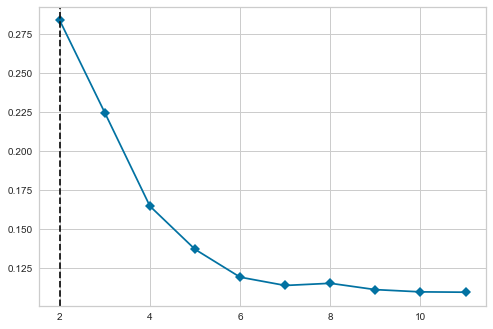

In [28]:
x = df_cluster.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(x_scaled)

score = visualizer.elbow_score_
value = visualizer.elbow_value_

In [32]:
clustering_kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['clusters'] = clustering_kmeans.fit_predict(df_cluster)

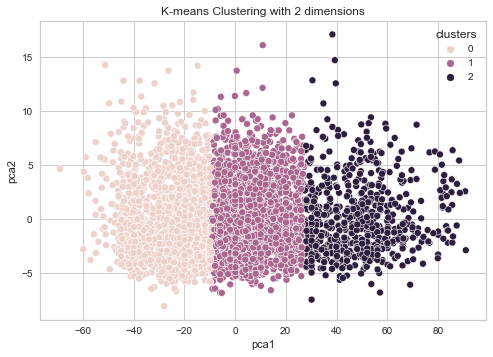

In [33]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_cluster)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_cluster['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [38]:
df_cluster_0 = df_cluster[df_cluster['clusters']==0]
df_cluster_1 = df_cluster[df_cluster['clusters']==1]
df_cluster_2 = df_cluster[df_cluster['clusters']==2]

### _Finding the ideal number of clusters using Elbow Method_

In [40]:
df_cluster_2 = df.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s'], axis=1)
columns = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "nltk", "Happy", "Angry", "Surprise", "Sad", "Fear"]
df_cluster_2 = df[columns]
df_cluster_2.dropna(inplace=True)
df_cluster_2.reset_index(drop=True, inplace=True)
df_cluster_2

danceability  energy  loudness  speechiness  acousticness  instrumentalness  liveness  valence    tempo    nltk  Happy  Angry  Surprise   Sad  Fear
0            0.443   0.403    -8.339       0.0322        0.6310          0.000000    0.1110   0.4100  143.462  0.9856   0.00   0.35      0.00  0.05  0.60
1            0.755   0.876    -8.867       0.0362        0.3570          0.000005    0.2200   0.9540  102.762  0.9716   0.17   0.00      0.17  0.40  0.27
2            0.474   0.473   -11.454       0.0601        0.5450          0.000001    0.0356   0.5610   77.583  0.9271   0.00   0.20      0.30  0.40  0.10
3            0.598   0.797    -6.793       0.0332        0.0424          0.000407    0.0717   0.6220  123.566  0.1280   0.12   0.06      0.47  0.12  0.24
4            0.611   0.470    -9.135       0.0356        0.5790          0.000000    0.5810   0.9700   85.527  0.9091   0.03   0.10      0.03  0.41  0.41
...            ...     ...       ...          ...           ...               ...       ...      ...      ...     ...    ...    ...       ...   ...   ...
4623         0.902   0.839    -9.447       0.2080        0.0933          0.000000    0.1020   0.7270  133.989 -0.9618   0.00   0.00      0.00  0.00  1.00
4624         0.530   0.538    -6.672       0.0335        0.1700          0.000003    0.2480   0.2880  148.051 -0.7753   0.09   0.36      0.09  0.27  0.18
4625         0.847   0.678    -8.635       0.1090        0.0669          0.000000    0.2740   0.8110   97.984  0.9853   0.33   0.00      0.06  0.33  0.28
4626         0.562   0.460    -4.173       0.2590        0.4760          0.000000    0.1070   0.6230  176.055  0.9900   0.29   0.29      0.00  0.21  0.21
4627         0.386   0.136    -9.267       0.0458        0.9320          0.000000    0.0653   0.0976   67.016 -0.8271   0.19   0.04      0.15  0.42  0.19

[4628 rows x 15 columns]

In [41]:
from itertools import combinations, permutations

comb = combinations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),comb))

column_names = ["features", "score", "elbow"]
df2 = pd.DataFrame(columns = column_names)

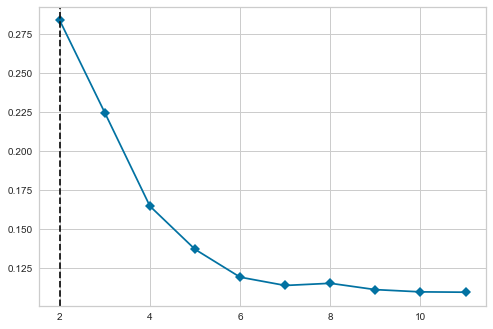

In [35]:
# # Testing Setup
# x = df.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# # Remove the rows with nan values
# x_scaled = x_scaled[~np.isnan(x_scaled).any(axis=1)]
# df = pd.DataFrame(x_scaled)

# # Testing
# model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
# visualizer.fit(x_scaled)
# score = visualizer.elbow_score_
# value = visualizer.elbow_value_

Input error
Input error
Input error
Input error


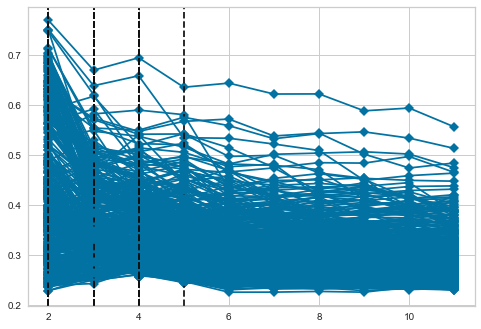

In [31]:
for i in list(output):
    try:
        df1 = df_cluster[[ i[0], i[1], i[2] ]]
        x = df1.values 
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)

        model = KMeans(random_state=0)
        visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
        visualizer.fit(x_scaled)

        score = visualizer.elbow_score_
        value = visualizer.elbow_value_
        if score > 0.4:
            # visualizer.show()
            idx = df1.columns
            mylist = idx.tolist()
            dict = {
                "features": mylist,
                "score": score,
                "elbow": value
            }
            df2 = df2.append(dict, ignore_index=True)
    except: 
        print("Input error")

In [46]:
# path = './data'
# df2 = pd.read_csv(path+'/elbow_cluster_combinations.csv')
display(df2.sort_values(by='score', ascending=False)[:10])

features     score  elbow
74    ['instrumentalness', 'nltk', 'speechiness']  0.768484      2
93          ['Angry', 'instrumentalness', 'nltk']  0.749926      2
34   ['Angry', 'instrumentalness', 'speechiness']  0.748829      2
109              ['Angry', 'nltk', 'speechiness']  0.746798      2
130      ['instrumentalness', 'liveness', 'nltk']  0.712430      2
115           ['liveness', 'nltk', 'speechiness']  0.712027      2
222      ['instrumentalness', 'loudness', 'nltk']  0.702432      2
37            ['loudness', 'nltk', 'speechiness']  0.701431      2
159                 ['Angry', 'liveness', 'nltk']  0.697538      2
1           ['Happy', 'instrumentalness', 'nltk']  0.696565      2

In [47]:
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=42,
                max_iter = 500).fit(x_scaled)
df1['kmeans'] = kmeans.labels_
df1.columns = ['instrumentalness', 'nltk', 'speechiness', 'kmeans']
df1

NameError: name 'df1' is not defined

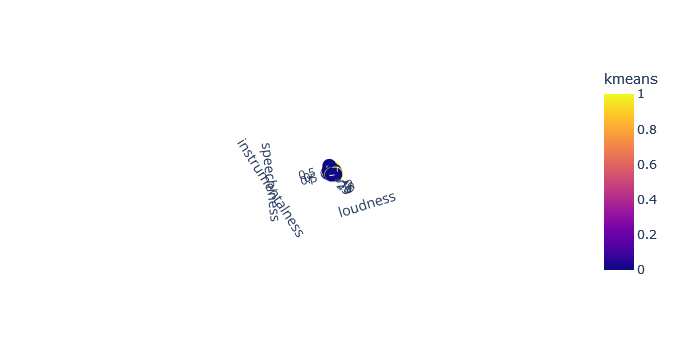

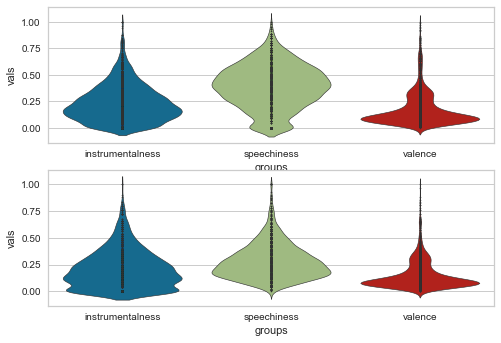

In [61]:
import plotly.express as px

kmeans = df1['kmeans']
df['kmeans'] = kmeans

fig = px.scatter_3d(df, x='instrumentalness', y='loudness', z='speechiness',
              color='kmeans')
fig.show()

# Violin Plot for each cluster 
c0 = df1[df1['kmeans']==0]
c1 = df1[df1['kmeans']==1]
# c2 = df1[df1['kmeans']==2]
# c3 = df1[df1['kmeans']==3]

c0.drop(['kmeans'], axis=1, inplace=True)
c1.drop(['kmeans'], axis=1, inplace=True)
# c2.drop(['kmeans'], axis=1, inplace=True)
# c2.drop(['kmeans'], axis=1, inplace=True)


x = c0.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = ['instrumentalness', 'speechiness', 'valence']
c0=c0.melt(var_name='groups', value_name='vals')

x = c1.values 
min_max_scaler = preprocessing.MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = ['instrumentalness', 'speechiness', 'valence']
c1=c1.melt(var_name='groups', value_name='vals')

f, axes = plt.subplots(2, 1)
ax = sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
# ax = sns.violinplot( data=c2 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[2])
# ax = sns.violinplot( data=c3 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[3])

plt.show()

In [ ]:
### Testing with 2 features
import plotly.express as px

kmeans = df1['kmeans']
df['kmeans'] = kmeans

fig = px.scatter(df, x='Angry', y='tempo',
              color='kmeans')
fig.show()

### Keras for NLP

In [68]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional
from keras.models import Sequential
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [28]:
xData = []
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

for lyric in songs['lyrics']:
    if type(lyric) is not float:
        # Tokenized lyrics into individual words. 
        tokens = word_tokenize(lyric)
        tokens = [word.lower() for word in tokens]

        # Punctuation was removed and letters were changed to lower case. 
        tokens_nopunc = [word.translate(translator) for word in tokens]

        # Remove non-alphabetic tokens
        words = [word for word in tokens_nopunc if word.isalpha()]

        # Remove stop words from the lyric
        words = [word for word in words if not word in stop_words]

        # Append to training data
        xData.append(words)

In [ ]:
tokenizer = Tokenizer()
lyrics_list = songs['lyrics'].to_list()
corpus = " ".join(map(str,lyrics_list))
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
# print(total_words)

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

# *References*

https://stackoverflow.com/